# Investigating Posts that Peform Similarly 
Our client is interested in knowing which posts perform well, can we group these together and find similar factors?

# 1. Import Data

In [2]:
!pip install pandas -U scikit-learn

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('clusterdata.csv')

In [5]:
df.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,af60c7da-acb4-11ec-880a-a0cec8d2d278,1648512000,short,216,58,5,53,18,12,21,6,43
1,af60c7e4-acb4-11ec-ab31-a0cec8d2d278,1647993600,short,196,45,0,73,35,8,16,25,39
2,af60c7f9-acb4-11ec-bead-a0cec8d2d278,1647907200,short,138,6,13,59,33,5,16,12,13
3,af60c815-acb4-11ec-a572-a0cec8d2d278,1648080000,short,81,9,1,9,34,18,11,4,5
4,af60c80d-acb4-11ec-aeb5-a0cec8d2d278,1647820800,short,166,53,11,75,0,5,17,24,45


In [6]:
df.tail()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7042,af60c816-acb4-11ec-b01d-a0cec8d2d278,1648166400,photo,293,15,25,173,79,9,15,17,0
7043,af60c7fd-acb4-11ec-8226-a0cec8d2d278,1647993600,short,119,14,0,24,58,8,15,13,1
7044,af60c7e0-acb4-11ec-9163-a0cec8d2d278,1648166400,short,100,9,5,0,46,25,13,8,8
7045,af60c7f6-acb4-11ec-ba47-a0cec8d2d278,1647388800,short,74,10,8,0,38,15,16,0,5
7046,af60c7d9-acb4-11ec-84c2-a0cec8d2d278,1648166400,video,225,46,7,142,23,11,30,19,0


# 2. Split Data into Training and Testing

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.3, random_state=1234)

# 3. Exploratory Data Analysis

## Review Data

In [8]:
train.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [9]:
# types of posts
train.post_type.unique()

array(['short', 'video', 'photo', 'text'], dtype=object)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4932 entries, 5145 to 2863
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        4932 non-null   object
 1   published      4932 non-null   int64 
 2   post_type      4932 non-null   object
 3   num_reactions  4932 non-null   int64 
 4   num_comments   4932 non-null   int64 
 5   num_shares     4932 non-null   int64 
 6   num_likes      4932 non-null   int64 
 7   num_loves      4932 non-null   int64 
 8   num_wows       4932 non-null   int64 
 9   num_hahas      4932 non-null   int64 
 10  num_sads       4932 non-null   int64 
 11  num_angrys     4932 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 500.9+ KB


In [11]:
train.isnull().sum()

user_id          0
published        0
post_type        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

## Summary Statistics

In [12]:
train.describe()

,published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,4.932000e+03,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,1.647943e+09,189.214923,29.540552,9.145985,85.684712,41.381387,14.974250,18.666464,13.934712,14.573398
std,3.513294e+05,75.843449,20.669640,7.807651,67.498828,24.422694,5.012694,8.141871,9.826429,16.039171
min,1.647389e+09,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.647648e+09,121.000000,10.000000,3.000000,19.000000,23.000000,12.000000,13.000000,6.000000,1.000000
50%,1.647994e+09,191.000000,20.000000,7.000000,79.000000,37.000000,15.000000,17.000000,13.000000,8.000000
75%,1.648253e+09,256.000000,50.000000,14.000000,150.000000,57.000000,18.000000,24.000000,20.000000,23.000000
max,1.648512e+09,378.000000,70.000000,37.000000,239.000000,127.000000,34.000000,45.000000,51.000000,67.000000


In [13]:
train.describe(include='object')

,user_id,post_type
count,4932,4932
unique,100,4
top,af60c7c8-acb4-11ec-adad-a0cec8d2d278,short
freq,71,3081


So this dataset describes 100 users

## Plot Distributions

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

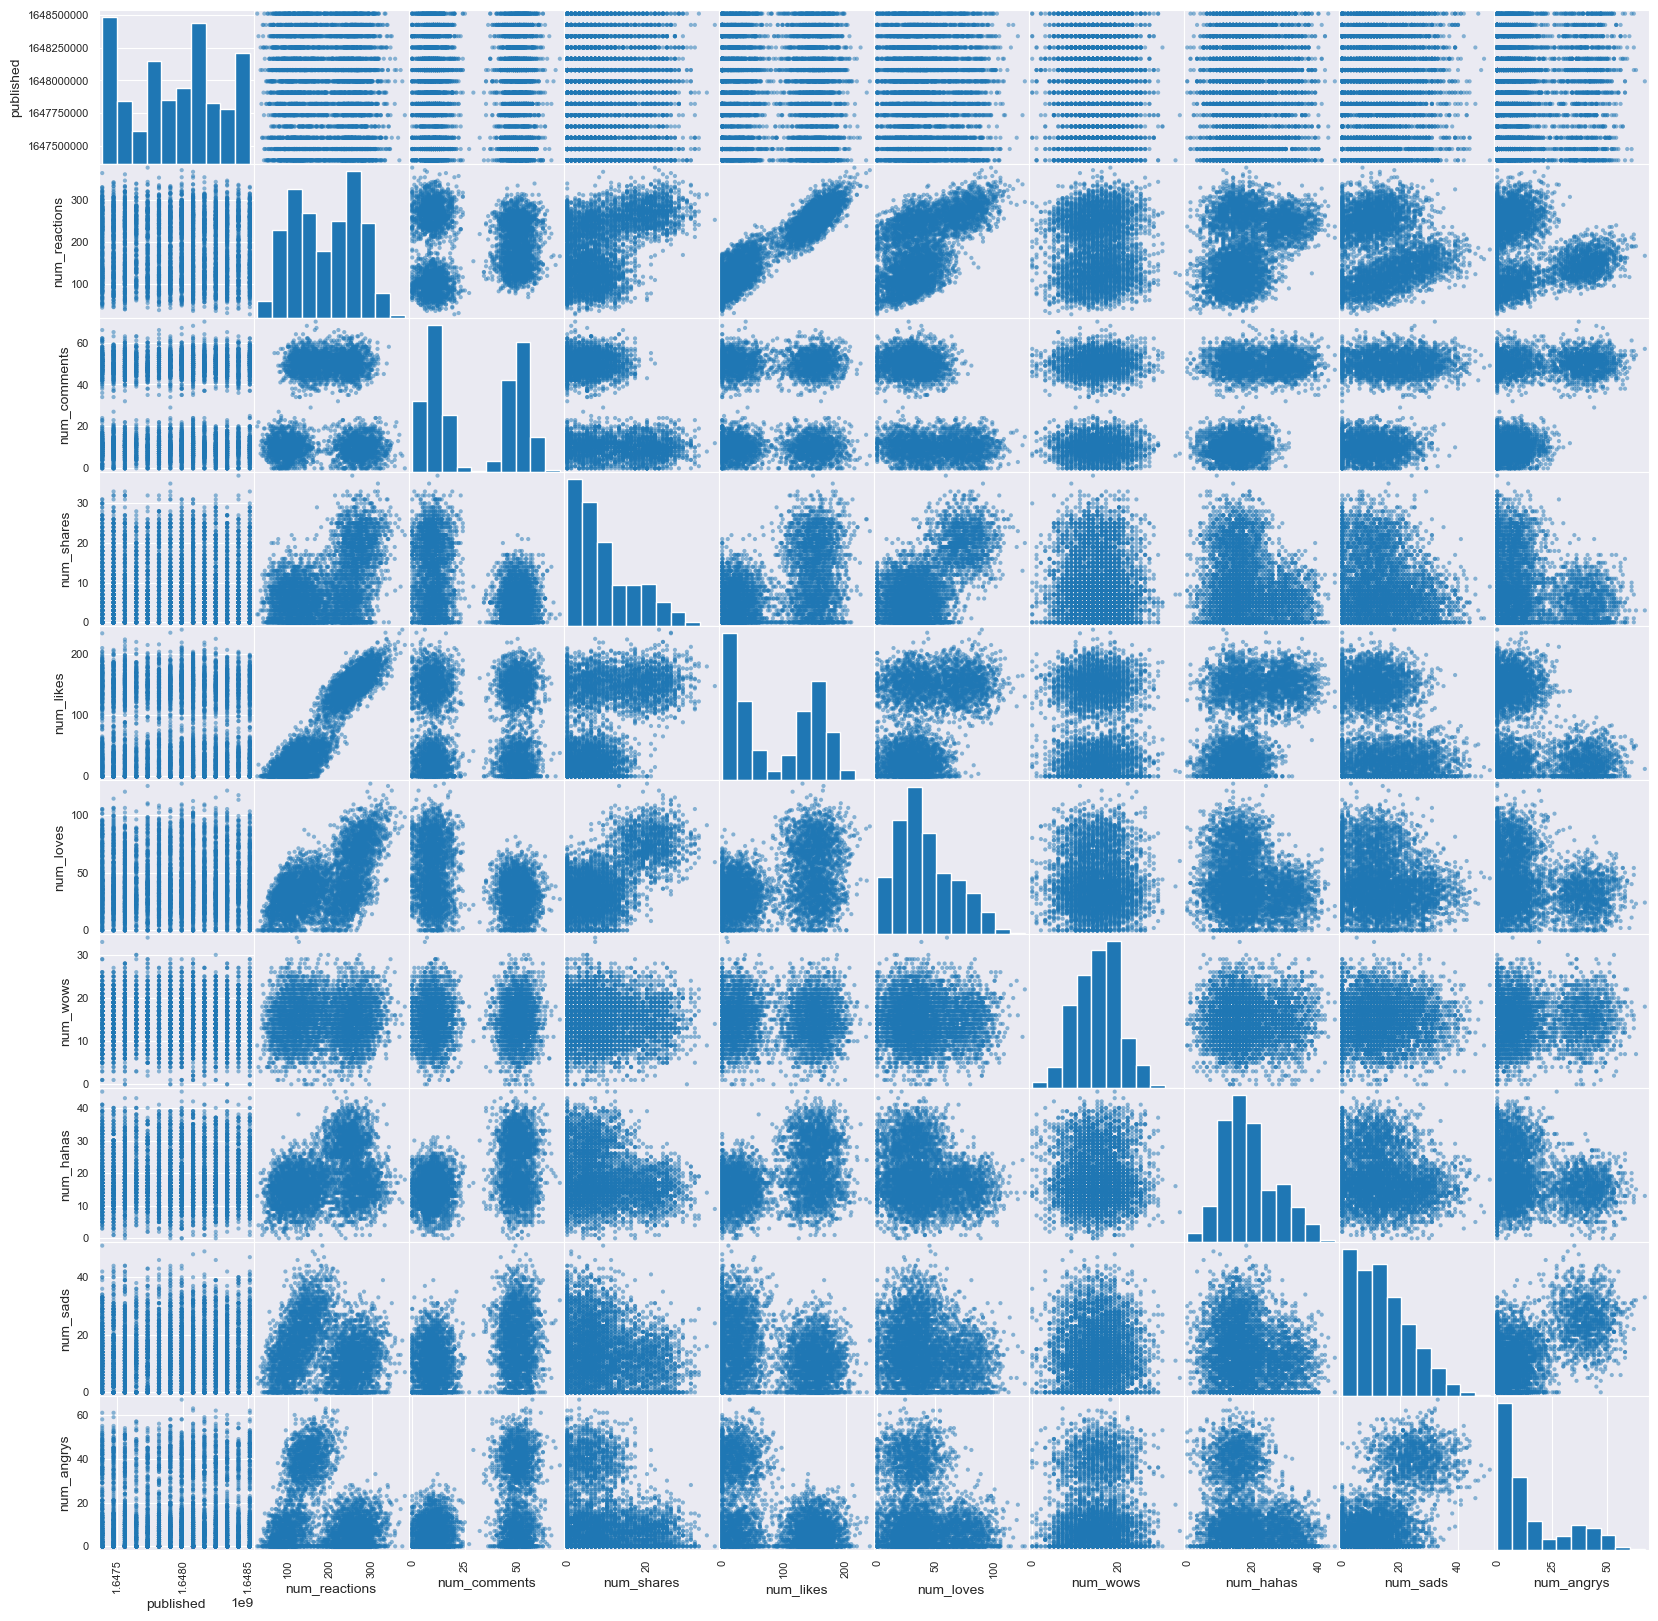

In [15]:
scatter_matrix(train, figsize=(20,20))
plt.show()

## Review Types of Posts

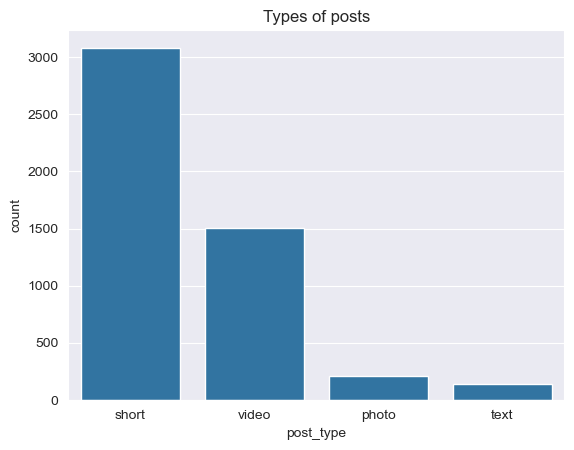

In [16]:
sns.countplot(x=train['post_type'])
plt.title('Types of posts')
plt.show()

## Can we see any relationships between Post Type and Responses?

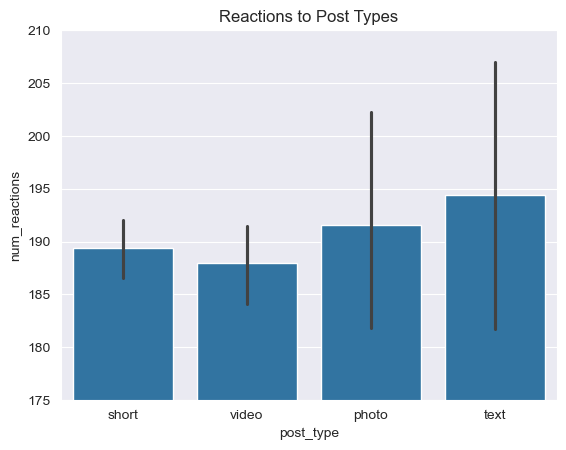

In [17]:
sns.barplot(x=train['post_type'], y=train['num_reactions']).set_title('Reactions to Post Types')
plt.ylim((175,210))
plt.show()

## What does status published represent?

In [18]:
train['timestamp'] = pd.to_datetime(train['published'],unit='s')

In [19]:
train.dtypes

user_id                  object
published                 int64
post_type                object
num_reactions             int64
num_comments              int64
num_shares                int64
num_likes                 int64
num_loves                 int64
num_wows                  int64
num_hahas                 int64
num_sads                  int64
num_angrys                int64
timestamp        datetime64[ns]
dtype: object

## Is there a relationship with time?

In [20]:
train['day'] = train['timestamp'].dt.day
train['day_name'] = train['timestamp'].dt.day_name()
train['monthstart'] = train['timestamp'].dt.is_month_start
train['monthend'] = train['timestamp'].dt.is_month_end
train['quarterstart'] = train['timestamp'].dt.is_quarter_start
train['quarterend'] = train['timestamp'].dt.is_quarter_end
train['month'] = train['timestamp'].dt.month

In [21]:
train.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,timestamp,day,day_name,monthstart,monthend,quarterstart,quarterend,month
5145,af60c7e1-acb4-11ec-a565-a0cec8d2d278,1647734400,short,378,0,22,214,98,18,18,7,23,2022-03-20,20,Sunday,False,False,False,False,3
5940,af60c819-acb4-11ec-ac22-a0cec8d2d278,1647734400,video,248,11,24,127,69,19,8,25,0,2022-03-20,20,Sunday,False,False,False,False,3
5046,af60c813-acb4-11ec-9b28-a0cec8d2d278,1647648000,video,147,57,0,26,57,12,4,14,34,2022-03-19,19,Saturday,False,False,False,False,3
6089,af60c809-acb4-11ec-8a3c-a0cec8d2d278,1647388800,short,114,51,6,2,22,7,21,22,40,2022-03-16,16,Wednesday,False,False,False,False,3
3890,af60c7e2-acb4-11ec-9952-a0cec8d2d278,1648166400,video,158,47,0,28,39,7,12,33,39,2022-03-25,25,Friday,False,False,False,False,3


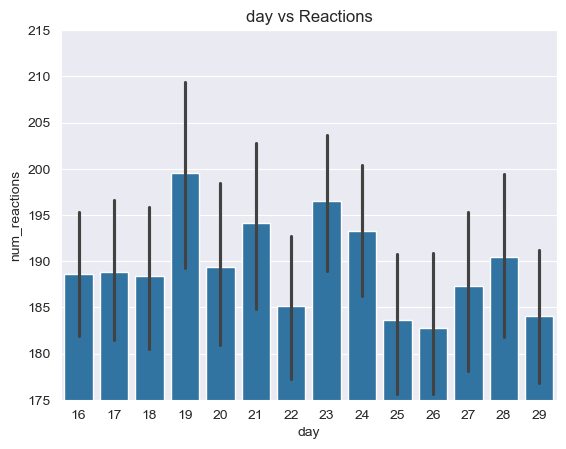

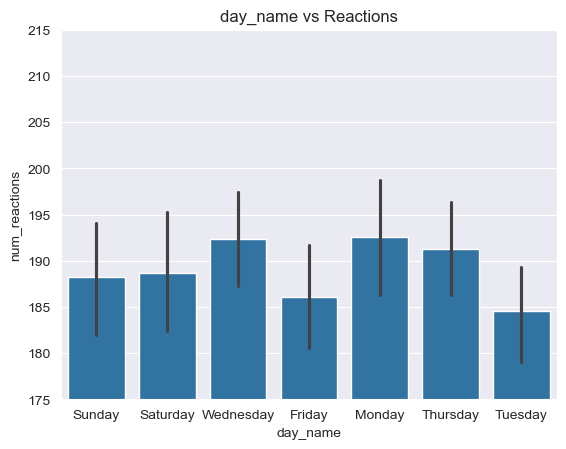

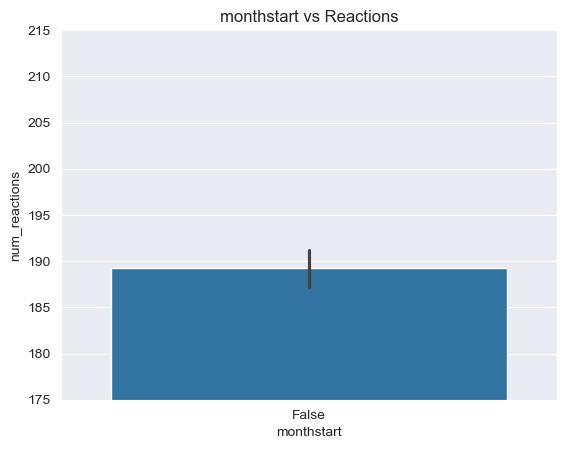

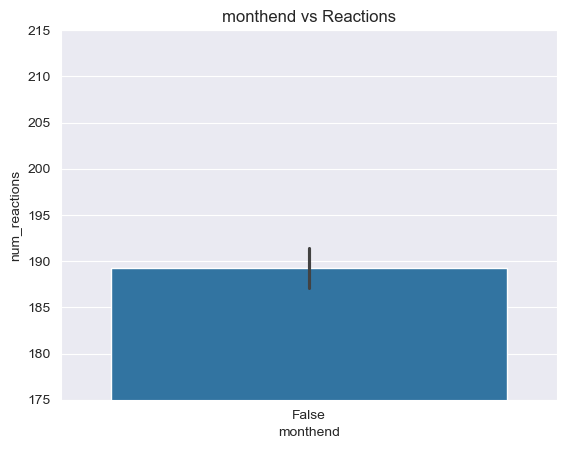

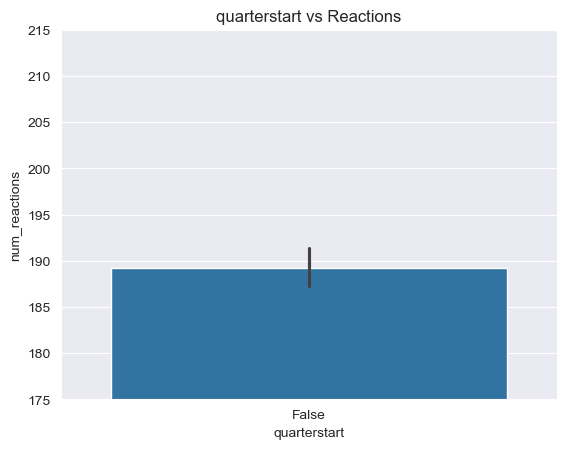

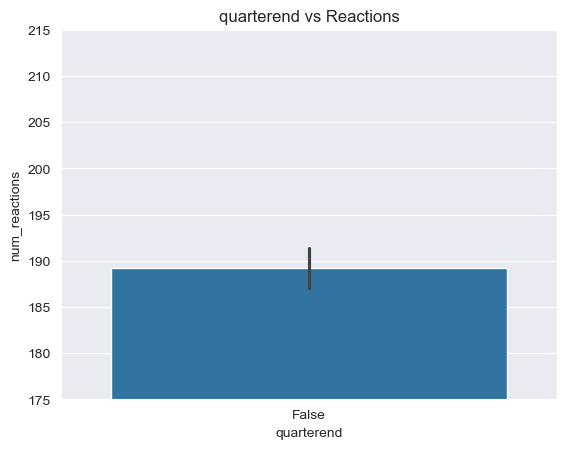

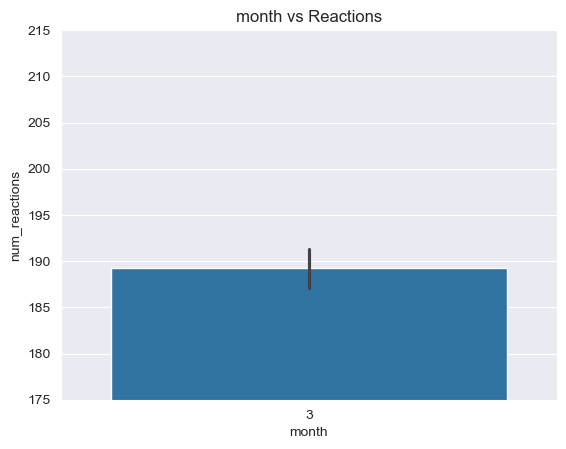

In [22]:
for col in train.columns[-7:]:
    sns.barplot(x=col, y='num_reactions', data=train).set_title(f'{col} vs Reactions')
    plt.ylim((175,215))
    plt.show()

In [23]:
train.month.unique()

array([3], dtype=int32)

In [24]:
train = train.drop(['timestamp','published','day','monthstart','monthend','quarterstart','quarterend','month'],axis=1)

So we have only one month of data

# Data Preprocessing

## StandardScaler

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [26]:
train.dtypes

user_id          object
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
day_name         object
dtype: object

In [27]:
scaler = StandardScaler()
scaled = scaler.fit_transform(train.drop(['user_id','post_type','day_name'], axis=1))

In [28]:
scaled

array([[ 2.48939388, -1.42932083,  1.64650258, ..., -0.08186465,
        -0.70579203,  0.52542966],
       [ 0.77516302, -0.89708537,  1.90268753, ..., -1.31020805,
         1.12618836, -0.90870506],
       [-0.55666249,  1.32862658, -1.17153193, ..., -1.80154541,
         0.00664479,  1.21132018],
       ...,
       [-0.43798497,  0.94154624, -0.65916202, ...,  0.28663836,
         0.92263498,  2.14662544],
       [-1.50608266, -0.60677512, -0.27488459, ..., -0.45036767,
        -0.29868528, -0.65929033],
       [ 0.55099437,  0.84477615, -0.14679211, ...,  2.2519878 ,
        -1.21467547, -0.16046086]])

In [29]:
pd.DataFrame(scaled).describe()

,0,1,2,3,4,5,6,7,8
count,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03
mean,-9.940683e-17,8.355936e-17,1.051695e-16,-8.211869e-17,-9.076276e-17,-4.898308e-17,-1.959323e-16,4.394070e-17,-1.152543e-17
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-2.139029e+00,-1.429321e+00,-1.171532e+00,-1.269554e+00,-1.694554e+00,-2.987569e+00,-2.292883e+00,-1.418229e+00,-9.087051e-01
25%,-8.995087e-01,-9.454704e-01,-7.872545e-01,-9.880390e-01,-7.527118e-01,-5.934038e-01,-6.960364e-01,-8.075687e-01,-8.463514e-01
50%,2.353872e-02,-4.616200e-01,-2.748846e-01,-9.904453e-02,-1.794164e-01,5.137520e-03,-2.046990e-01,-9.513190e-02,-4.098756e-01
75%,8.806542e-01,9.899313e-01,6.217628e-01,9.529322e-01,6.395771e-01,6.036788e-01,6.551414e-01,6.173049e-01,5.254297e-01
max,2.489394e+00,1.957632e+00,3.567890e+00,2.271607e+00,3.506054e+00,3.795899e+00,3.234663e+00,3.772382e+00,3.268992e+00


## One Hot Encoder

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [32]:
encoded = encoder.fit_transform(train[['user_id','post_type','day_name']])

In [33]:
encoded.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [34]:
len(train['user_id'].unique())

100

In [35]:
encoder.get_feature_names_out()

array(['user_id_af60c7c0-acb4-11ec-b646-a0cec8d2d278',
       'user_id_af60c7c1-acb4-11ec-8cb0-a0cec8d2d278',
       'user_id_af60c7c2-acb4-11ec-8608-a0cec8d2d278',
       'user_id_af60c7c3-acb4-11ec-97e2-a0cec8d2d278',
       'user_id_af60c7c4-acb4-11ec-9d00-a0cec8d2d278',
       'user_id_af60c7c5-acb4-11ec-83fd-a0cec8d2d278',
       'user_id_af60c7c6-acb4-11ec-918b-a0cec8d2d278',
       'user_id_af60c7c7-acb4-11ec-b103-a0cec8d2d278',
       'user_id_af60c7c8-acb4-11ec-adad-a0cec8d2d278',
       'user_id_af60c7c9-acb4-11ec-9a3b-a0cec8d2d278',
       'user_id_af60c7ca-acb4-11ec-87b8-a0cec8d2d278',
       'user_id_af60c7cb-acb4-11ec-b3b4-a0cec8d2d278',
       'user_id_af60c7cc-acb4-11ec-b9c1-a0cec8d2d278',
       'user_id_af60c7cd-acb4-11ec-a542-a0cec8d2d278',
       'user_id_af60c7ce-acb4-11ec-b2df-a0cec8d2d278',
       'user_id_af60c7cf-acb4-11ec-96a2-a0cec8d2d278',
       'user_id_af60c7d0-acb4-11ec-935e-a0cec8d2d278',
       'user_id_af60c7d1-acb4-11ec-ab28-a0cec8d2d278',
       'us

In [36]:
X_train = np.c_[scaled, encoded.toarray()]

In [37]:
X_train

array([[ 2.48939388, -1.42932083,  1.64650258, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77516302, -0.89708537,  1.90268753, ...,  0.        ,
         0.        ,  0.        ],
       [-0.55666249,  1.32862658, -1.17153193, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.43798497,  0.94154624, -0.65916202, ...,  0.        ,
         0.        ,  0.        ],
       [-1.50608266, -0.60677512, -0.27488459, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55099437,  0.84477615, -0.14679211, ...,  0.        ,
         0.        ,  0.        ]])

# Modelling

## Fit Models with a Range of Clusters

In [38]:
from sklearn.cluster import KMeans

In [39]:
fit_models = {}
for k in range(2, 21):
    model = KMeans(n_clusters=k, n_init=10)  
    model.fit(X_train)
    fit_models[k] = model

In [40]:
fit_models

{2: KMeans(n_clusters=2, n_init=10),
 3: KMeans(n_clusters=3, n_init=10),
 4: KMeans(n_clusters=4, n_init=10),
 5: KMeans(n_clusters=5, n_init=10),
 6: KMeans(n_clusters=6, n_init=10),
 7: KMeans(n_clusters=7, n_init=10),
 8: KMeans(n_init=10),
 9: KMeans(n_clusters=9, n_init=10),
 10: KMeans(n_clusters=10, n_init=10),
 11: KMeans(n_clusters=11, n_init=10),
 12: KMeans(n_clusters=12, n_init=10),
 13: KMeans(n_clusters=13, n_init=10),
 14: KMeans(n_clusters=14, n_init=10),
 15: KMeans(n_clusters=15, n_init=10),
 16: KMeans(n_clusters=16, n_init=10),
 17: KMeans(n_clusters=17, n_init=10),
 18: KMeans(n_clusters=18, n_init=10),
 19: KMeans(n_clusters=19, n_init=10),
 20: KMeans(n_clusters=20, n_init=10)}

## Select Best Cluster size using Elbow Method

In [41]:
results = []
for k, model in fit_models.items():
    res = model.inertia_
    results.append(res)

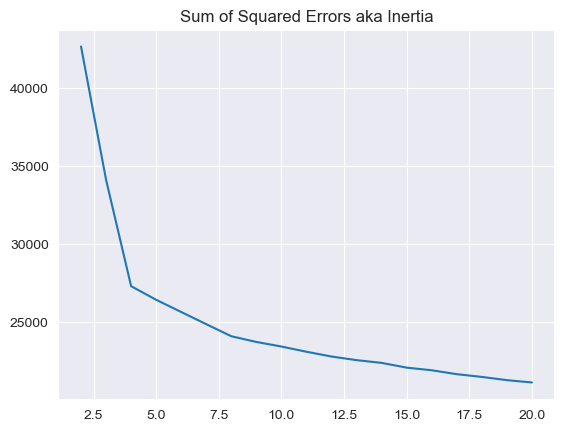

In [42]:
plt.title('Sum of Squared Errors aka Inertia')
plt.plot(range(2,21), results)
plt.show()

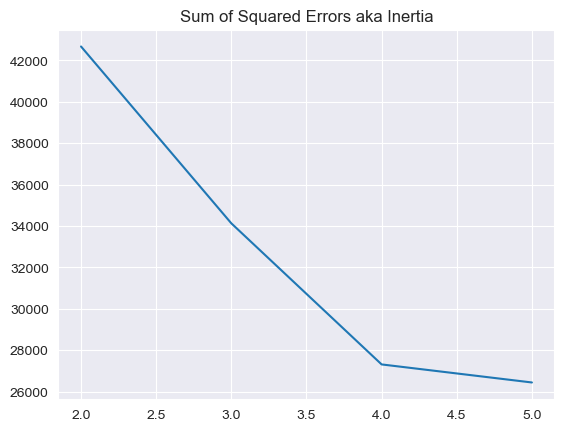

In [43]:
plt.title('Sum of Squared Errors aka Inertia')
plt.plot(range(2,6), results[:4])
plt.show()

So we pick k=4 because this is the point of <b>sharp curve</b>

# Evaluating the Model

In [44]:
model = fit_models[4]

In [45]:
def transform(raw_df, onehot, scaler):
    X = raw_df.copy()
    X['timestamp'] = pd.to_datetime(X['published'], unit='s')
    X['day_name'] = X['timestamp'].dt.day_name()
    X = X.drop(['timestamp','published'], axis=1)
    
    encoded = onehot.transform(X[['user_id','post_type','day_name']])
    scaled = scaler.fit_transform(X.drop(['user_id','post_type','day_name'],axis=1).to_numpy())
    
    return np.c_[scaled, encoded.toarray()]

In [46]:
X_test = transform(test,encoder, scaler)

In [47]:
X_test.shape, X_train.shape

((2115, 120), (4932, 120))

In [48]:
clusters = model.predict(X_test)
test['cluster'] = clusters
test.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
4545,af60c7fa-acb4-11ec-9224-a0cec8d2d278,1648166400,short,129,53,9,21,13,13,19,29,34,3
2627,af60c7d0-acb4-11ec-935e-a0cec8d2d278,1647820800,video,205,6,18,140,40,7,15,3,0,0
1076,af60c80f-acb4-11ec-87f7-a0cec8d2d278,1647907200,video,252,3,28,149,60,19,14,8,2,0
4824,af60c7e5-acb4-11ec-accd-a0cec8d2d278,1647388800,text,259,54,0,155,49,15,26,0,14,1
3411,af60c7d5-acb4-11ec-8bf8-a0cec8d2d278,1647993600,short,105,12,4,49,16,11,10,8,11,2


# Visualize

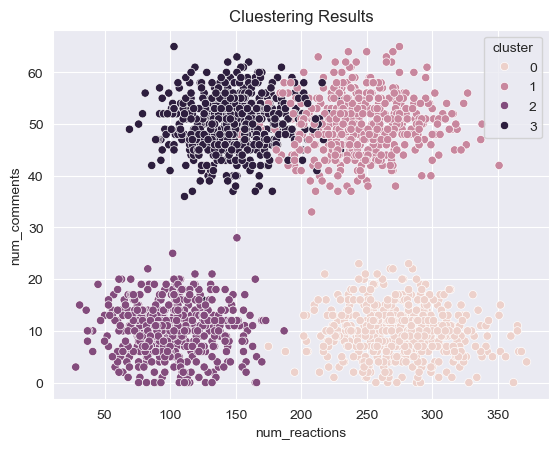

In [49]:
plt.title('Cluestering Results')
sns.scatterplot(x='num_reactions', y='num_comments', hue='cluster',data=test)
plt.show()

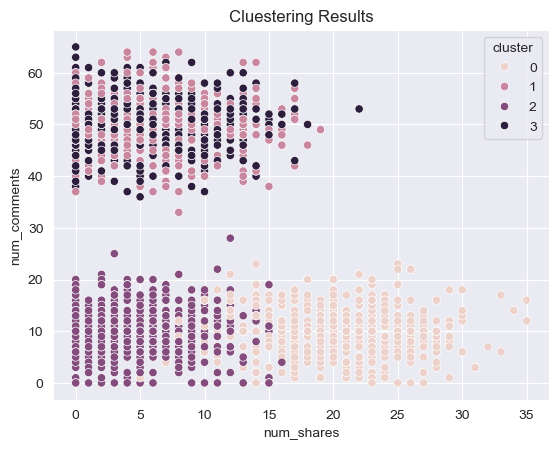

In [50]:
plt.title('Cluestering Results')
sns.scatterplot(x='num_shares', y='num_comments', hue='cluster',data=test)
plt.show()

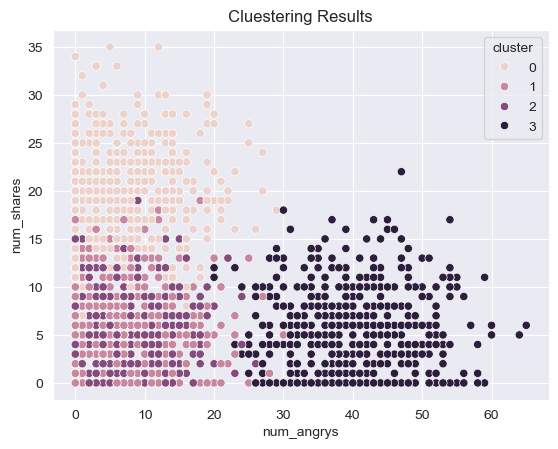

In [53]:
plt.title('Cluestering Results')
sns.scatterplot(x='num_angrys', y='num_shares', hue='cluster',data=test)
plt.show()

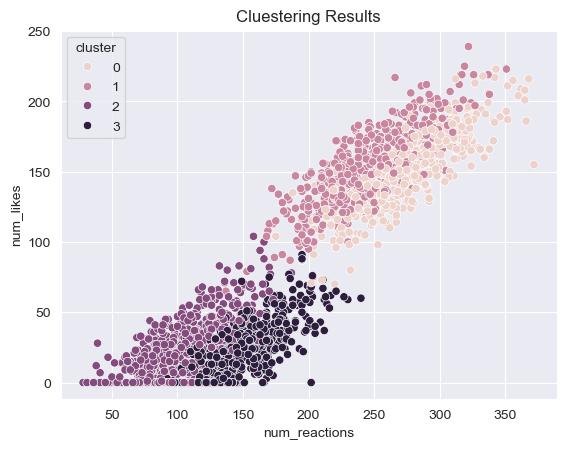

In [54]:
plt.title('Cluestering Results')
sns.scatterplot(x='num_reactions', y='num_likes', hue='cluster',data=test)
plt.show()